# 3. Decision Tree

Realicemos una predicción basada en un random forest. 
Se parte de los datos analizados, normalizados y acotados logrados en el punto 0, para el training.

Este método se basa en hacer varios decision trees. Veremos que necesita ajustes y no suele ser el mejor método para overfitting.

Partiendo de una contrucción del modelo, haremos un proceso iterativo de validación y ajuste del mismo (modificando parámetros y variables), hasta obtener el que mejor predice nuestra target, sin infra o sobreajustes

## Importación de datos y selección de variables


In [38]:
#Librerías a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importación de datos
melbourne_data = pd.read_csv("data/PreciosCasas/train_final.csv", sep='\t', encoding='utf-8') 

# print a summary of the data in Melbourne data
melbourne_data.describe()

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,...,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,728.805765,729.805765,56.877145,10460.434454,6.094715,5.576527,1971.194235,1984.818806,439.128346,46.645161,...,0.003432,0.082361,0.002059,0.868909,0.069321,0.002745,0.008236,0.013727,0.821551,0.084420
std,421.402158,421.402158,42.339638,9862.564977,1.376542,1.113638,30.190353,20.640669,432.964939,161.471529,...,0.058500,0.275008,0.045345,0.337616,0.254086,0.052342,0.090410,0.116395,0.383022,0.278112
min,0.000000,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.000000,365.000000,20.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,729.000000,730.000000,50.000000,9473.000000,6.000000,5.000000,1972.000000,1994.000000,383.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1093.000000,1094.000000,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,712.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1459.000000,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2188.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
#Vamos a ver que variables elegimos

print(melbourne_data.columns)

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)


Queremos prededir el precio, será nuestro target, para lo cual, cogeremos unas variables como pedictores ( de momento, las que vemos que probablemente mejor predicen la target, y en el proceso de iteración es cuando vamos verficándolo)

In [40]:
y= melbourne_data.SalePrice
print(y.head())
melbourne_predictors = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = melbourne_data[melbourne_predictors]
X.describe()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,10460.434454,1971.194235,1159.129032,345.560055,1.563487,2.866163,6.510638
std,9862.564977,30.190353,372.015864,435.505117,0.549961,0.816595,1.616384
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7540.000000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9473.000000,1972.000000,1086.000000,0.000000,2.000000,3.000000,6.000000
75%,11600.000000,2000.000000,1391.000000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,3228.000000,2065.000000,3.000000,8.000000,14.000000


## Implementación del modelo Decision Tree models

El modelo que vamos a hacer es scikit-learn, y luego validamos que tal es mediante Mean Absolute Error (MAE). El error de predicción será: error= valor actual−predicción

Para ser capaces de ir validando el modelo, lo separaremos en dos grupos, predictors and target. Lo haremos mediando un split con un número generaro aleatorio. Como queremos que todas las veces que ejecutemos el modelo nos salga lo mismo, estableceremos el argumento de random_state.

In [41]:
#Importación de librerías

from  sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#Separamos los datos en dos grupos, 
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)


**¿Por qué hacemos esa separación del df en dos grupos?**

En este punto, solo por practicar, veamos que pasa tanto si realizo esa separación como si no la hago

In [42]:
#1_ Si no cogieramos el training y validación: Hacemos el modelo
melbourne_model= DecisionTreeRegressor()
melbourne_model.fit(X,y)

#Veamos como funciona
print("1_training= test. Predicciones de estas casas: ")
print(X.head())
print("La predictions ")
print(melbourne_model.predict(X.head()))
print("y el real es")
print(y.head())

val_predicted_home_prices = melbourne_model.predict(X)
print("error para el conjunto de training es: ")
print (mean_absolute_error(y,val_predicted_home_prices ))


1_training= test. Predicciones de estas casas: 
   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  
La predictions 
[ 12.24769432  12.10901093  12.31716669  11.8493977   12.4292162 ]
y el real es
0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64
error para el conjunto de training es: 
0.000492273525725


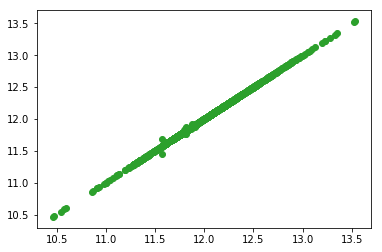

In [43]:
# Veamoslo en un scatter plot
plt.scatter(val_predicted_home_prices,y);
plt.show()

In [44]:
#2_ Si cogemos el training y validación: Hacemos el modelo
melbourne_model= DecisionTreeRegressor()
melbourne_model.fit(train_X,train_y)

#Veamos como funciona
print("2_ Training<> Test. Predicciones de estas casas:")
print(val_X.head())
print("The predictions are")
print(melbourne_model.predict(val_X.head()))
print("And the real is")
print(val_y.head())

#Error cometido en esta medicion MAE 
val_predicted_home_prices2 = melbourne_model.predict(val_X)
print("y en este caso el error es: ")
print (mean_absolute_error(val_y,val_predicted_home_prices2 ))

2_ Training<> Test. Predicciones de estas casas:
     LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
411    34650       1955      1056         0         1             3   
211    10420       2009      1212         0         2             3   
342     8544       1949      1040         0         2             2   
303     9800       1972       894         0         1             3   
159    19378       2005      1392      1070         2             4   

     TotRmsAbvGrd  
411             5  
211             6  
342             6  
303             5  
159             9  
The predictions are
[ 12.0917835   12.24673463  11.44249782  11.77528973  12.77705219]
And the real is
411    11.884489
211    12.133502
342    11.379394
303    11.917724
159    12.676076
Name: SalePrice, dtype: float64
y en este caso el error es: 
0.176069429794


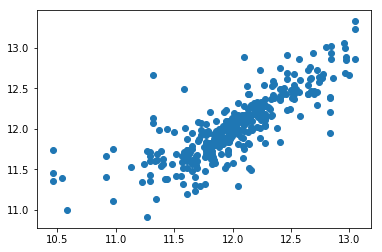

In [45]:
# Veamoslo en un scatter plot
plt.scatter(val_predicted_home_prices2, val_y );
plt.show()

Como se puede observar el primer modelo se comporta demasiado bien, pero es que está sobreajustado, y luego con el test se comportará mal. Es mejor el segundo

## Mejora del modelo

Vamos a cambiar el número de ramas que puede tener el modelo (no siempre más es mejor), pues tiene que servir para luego predecir bien

In [47]:
#  Ahora vamos a ajustar mejor el modelo definiendo cuantas ramas tendrá el arbol

def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0.205905
Max leaf nodes: 50  		 Mean Absolute Error:  0.157392
Max leaf nodes: 500  		 Mean Absolute Error:  0.176065
Max leaf nodes: 5000  		 Mean Absolute Error:  0.177223


## Selección

Genial, ya sabemos que parametros hemos de coger y que son lo más optimos en este caso, veamos que se obtiene ahora

In [53]:
melbourne_model_3= DecisionTreeRegressor(max_leaf_nodes=50)
melbourne_model_3.fit(train_X,train_y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=50, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [54]:
#Error cometido en esta medicion MAE 
val_predicted_home_prices_3 = melbourne_model_3.predict(val_X)
print("y en este caso el error es: ")
print (mean_absolute_error(val_y,val_predicted_home_prices_3 ))

y en este caso el error es: 
0.157391945875


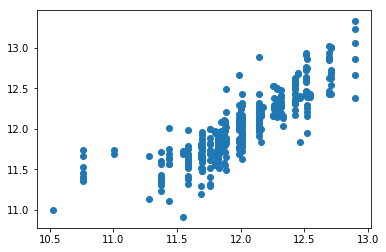

In [55]:
# Veamoslo en un scatter plot
plt.scatter(val_predicted_home_prices_3, val_y );
plt.show()